Exercício 1 - Efetuar imports das bibliotecas Pandas, numpy, datetime, matplotlib e seaborn

In [1]:
from pandas_datareader import data, wb
import pandas as pd
import datetime
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

%matplotlib inline

Exercício 2 - Precisamos obter dados usando o datareader de pandas. Obteremos informações sobre ações para os seguintes bancos:
* Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

Descubra como obter os dados de ações de 1 de janeiro de 2006 a 1º de janeiro de 2016 para cada um desses bancos. Defina cada banco como um dataframe separado, com o nome da variável para que esse banco seja seu símbolo de ticker. Isso envolverá algumas etapas:
1. Use datetime para definir objetos de início e fim de data e hora.
2. Descobrir o símbolo do ticker para cada banco.
2. Descubra como usar o datareader para pegar as cotações.

Use [esta página de documentação](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) para obter dicas e instruções. Use o google finance como um fonte, por exemplo:
    
     # Banco da América
     BAC = data.DataReader ("BAC", "google", início e fim)

In [2]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

#Bank of America
BAC = data.DataReader("BAC", 'yahoo', start, end)

#Citigroup
C = data.DataReader("C", 'yahoo', start, end)

#Goldman Sachs
GS = data.DataReader("GS", 'yahoo', start, end)

#JPMorgan Chase
JPM = data.DataReader("JPM", 'yahoo', start, end)

#Morgan Stanley
MS = data.DataReader("MS", 'yahoo', start, end)

#Wells Fargo
WFC = data.DataReader("WFC", 'yahoo', start, end)

Exercício 3 - Crie uma lista dos símbolos dos tickers (como strings) em ordem alfabética. Chame esta lista: tickers

In [6]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

Exercício 4 - Use pd.concat para concatenar os DataFrames do banco juntos em um único chamado bank_stocks. Defina o argumento das chaves igual à lista de tickers. Também preste atenção em que eixo você concatena.

In [12]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], axis=1, keys=tickers)

Exercício 5 - Defina os níveis dos nomes das colunas (este é preenchido para você):

In [14]:
bank_stocks.columns.names = ['Bank Ticker', 'Stock Info']

Exercício 6 - Verifique o cabeçalho do DataFrame bank_stocks.

In [15]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   35.298687  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   34.923801  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   34.968796  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   34.916302  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   34.938789  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  37.429329  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  37.455013  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  37.557716  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  37.596241  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  37.994202  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.408512  
2006-01-04   31.799999  31.530001  10870000.0  20.171795  
2006-01-05   31.500000  31.495001  10158000.0  20.149401  
2006-01-06   31.580000  31.680000   8403800.0  20.267757  
2006-01-09   31.674999  31.674999   5619600.0  20.264565  

[5 rows x 36 columns]

Exercício 7 - Qual é o preço máximo de fechamento para o estoque de cada banco durante todo o período?

In [22]:
bank_stocks['BAC']['Close'].max()

54.900001525878906

In [24]:
bank_stocks['C']['Close'].max()

564.0999755859375

In [25]:
bank_stocks['GS']['Close'].max()

247.9199981689453

In [26]:
bank_stocks['JPM']['Close'].max()

70.08000183105469

In [27]:
bank_stocks['MS']['Close'].max()

89.30000305175781

In [28]:
bank_stocks['WFC']['Close'].max()

58.52000045776367

In [29]:
#Solução sugerida:
bank_stocks.xs(key='Close', axis=1, level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

Exercício 8 - Crie um novo DataFrame vazio chamado returns. Este dataframe conterá os retornos para o ação de cada banco. Os retornos geralmente são definidos por:

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [32]:
returns = pd.DataFrame()

Exercício 9 - Podemos usar o método pct_change () pandas na coluna close para criar uma coluna que represente esse valor de retorno. Crie um loop for que vá e para cada Bank Stock Ticker cria essa coluna de retorno e configura-a como uma coluna nos dados DataFrame.

In [34]:
for tick in tickers:
    returns[tick+ ' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


Exercício 10 - Crie um parplot utilizando seaborn no dataframe de retorno.

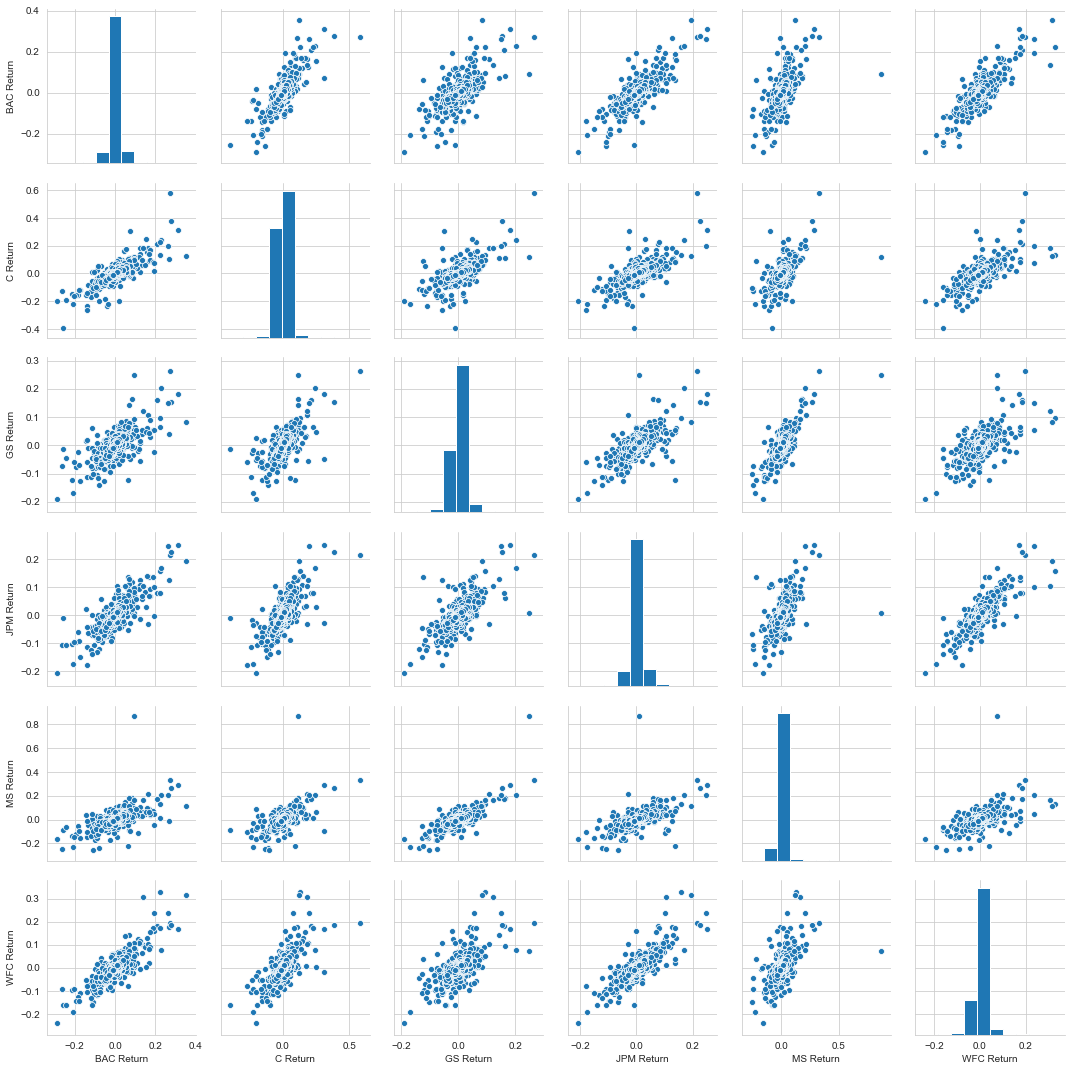

In [36]:
sns.pairplot(returns[1:])

Exercício 11 - Usando o seu DataFrame returns, descubra quais datas cada ação dos bancos teve o melhor e o pior dia de retorno. Você deve notar que 4 dos bancos compartilham o mesmo dia para a pior queda. Alguma coisa significante aconteceu naquele dia?

In [39]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [40]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

Exercício 12 - Dê uma olhada no desvio padrão dos retornos. Qual ação você classificaria como a mais arriscada durante todo o período de tempo? Qual você classificaria como a mais arriscado para o ano 2015?

In [43]:
returns.std()

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

In [47]:
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

Exercício 13 - Crie um distplot usando seaborn dos retornos de 2015 para Morgan Stanley

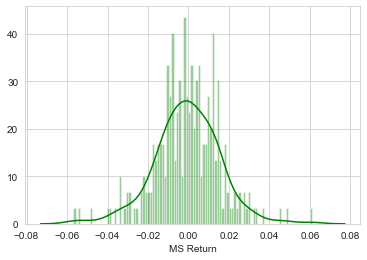

In [50]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'], color='green', bins=100)

Exercício 14 - Crie um distplot usando seaborn dos retornos de 2008 para CitiGroup

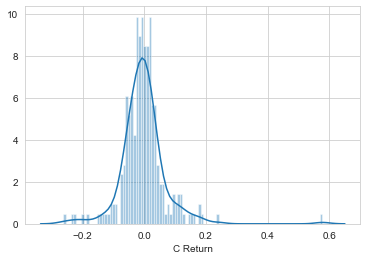

In [56]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'], bins=100)

Exercício 15 - Crie um gráfico de linha mostrando o preço de fechamento para cada banco para todo o índice de tempo. (Sugestão: tente usar um loop for ou use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) para obter uma seção transversal dos dados .)

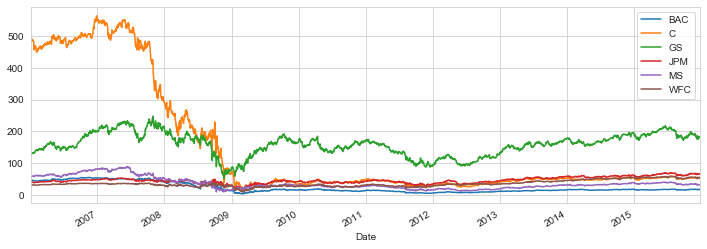

In [58]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4), label=tick)
plt.legend()

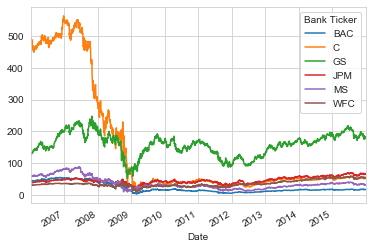

In [61]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info').plot()

Exercício 16 - Trace a média de 30 dias para o preço próximo do Bank Of America para o ano de 2008

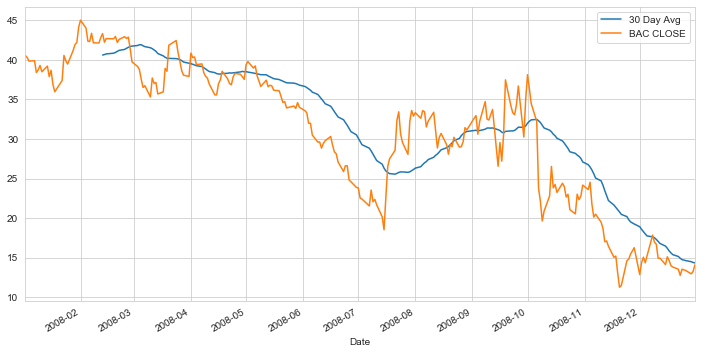

In [62]:
plt.figure(figsize=(12,6))
BAC['Close'].loc['2008-01-01':'2008-12-31'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2008-01-01':'2008-12-31'].plot(label='BAC CLOSE')
plt.legend()

Exercício 17 - Crie um mapa de calor da correlação entre os preços de fechamento das ações.

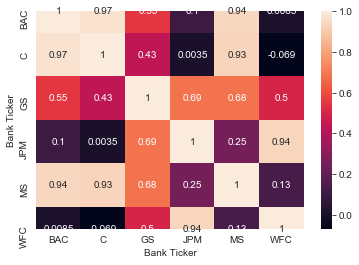

In [63]:
sns.heatmap(bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr(), annot=True)

Exercício 18 - use o clustermap do seaborn para agrupar as correlações.

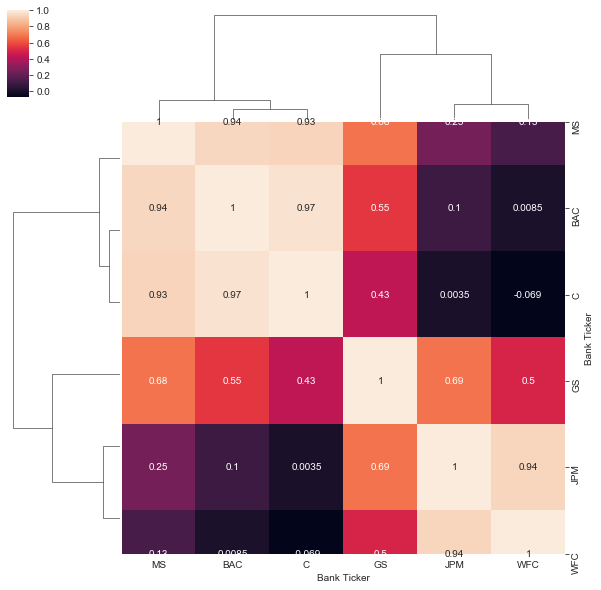

In [64]:
sns.clustermap(bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr(), annot=True)